In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1

1.1 Изучите количество памяти с помощью matplotlib

In [51]:
df = pd.read_csv('laptops_10.csv', encoding='latin-1')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


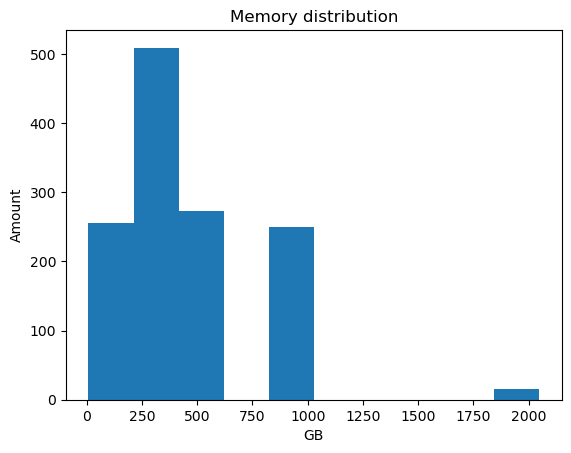

In [6]:
plt.hist(df['Memory_Amount'])
plt.title('Memory distribution')
plt.xlabel('GB')
plt.ylabel('Amount');

1.2 Изучите стоимость ноутбуков с помощью matplotlib

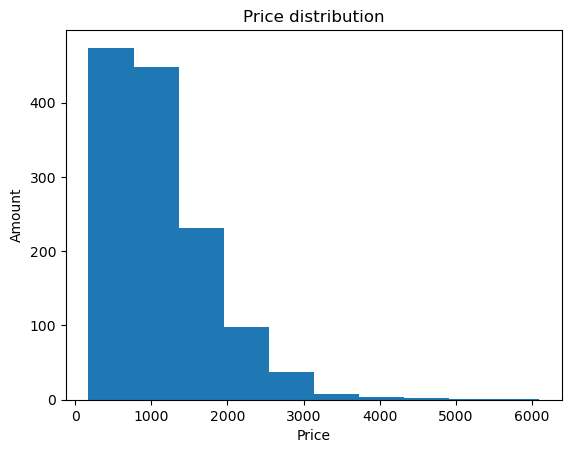

In [7]:
plt.hist(df['Price_euros'])
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Amount');

1.3 Изучите вес ноутбуков с помощью matplotlibПостройте графикНазовите графикСделайте именование оси x и оси yСделайте выводы

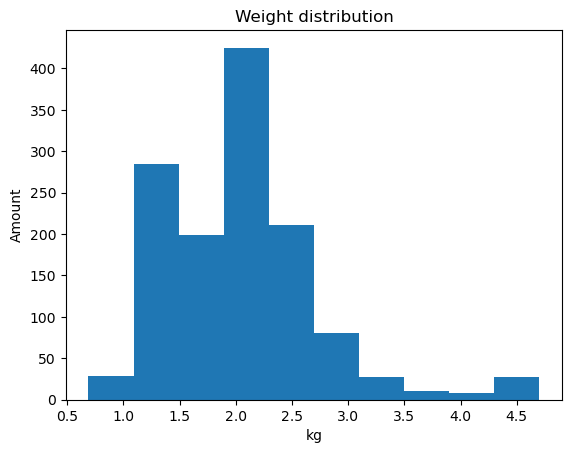

In [8]:
plt.hist(df['Weight'])
plt.title('Weight distribution')
plt.xlabel('kg')
plt.ylabel('Amount');

## Task 2
2.1 Изучите распределение типов носителя

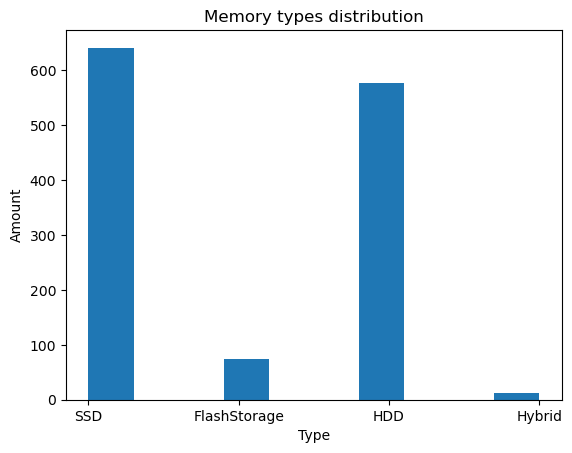

In [9]:
plt.hist(df['Memory_Type'])
plt.title('Memory types distribution')
plt.xlabel('Type')
plt.ylabel('Amount');

In [18]:
data = df['Memory_Type'].value_counts()
data

Memory_Type
SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: count, dtype: int64

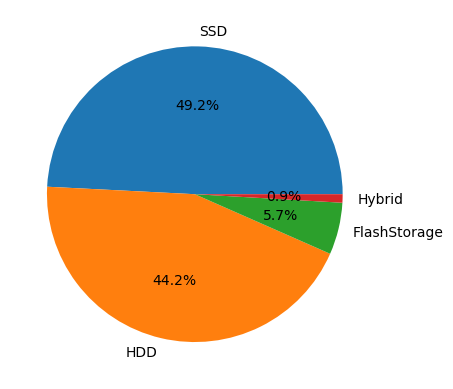

In [22]:
plt.pie(data.values, autopct='%.1f%%', labels=data.index);

2.2 Изучите распределение компаний производителей

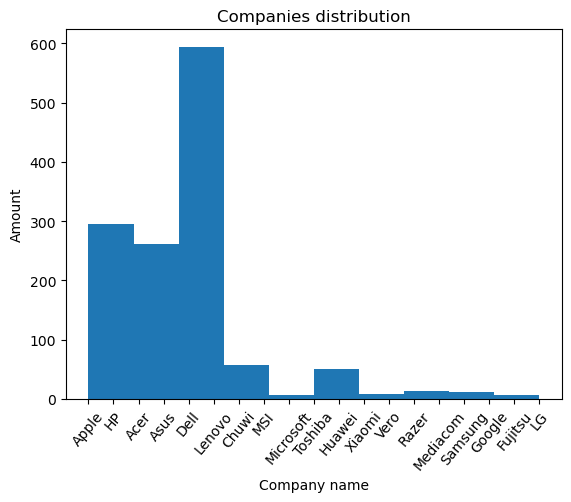

In [13]:
plt.hist(df['Company'])
plt.title('Companies distribution')
plt.xlabel('Company name')
plt.ylabel('Amount')
plt.xticks(rotation=50);

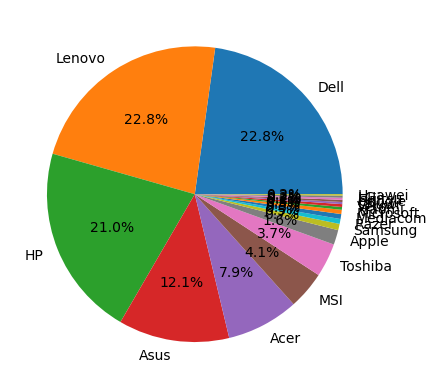

In [23]:
data = df['Company'].value_counts()
plt.pie(data.values, autopct='%.1f%%', labels=data.index);

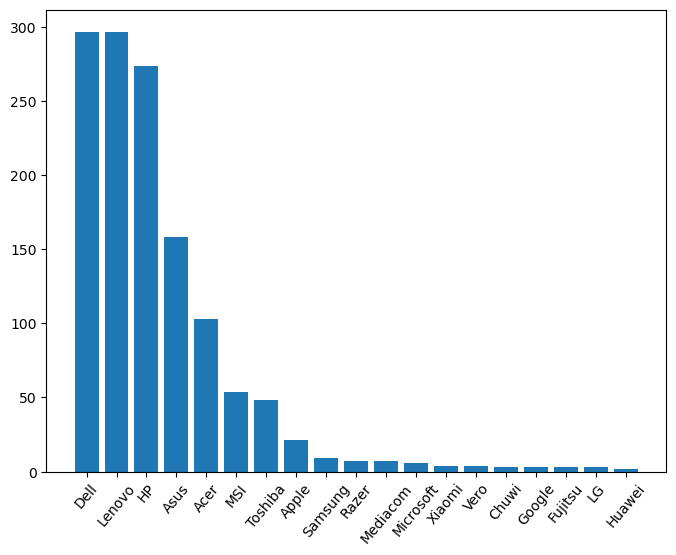

In [27]:
plt.figure(figsize=(8, 6))
plt.bar(data.index, data.values)
plt.xticks(rotation=50);

2.3 Изучите распределение операционной системы

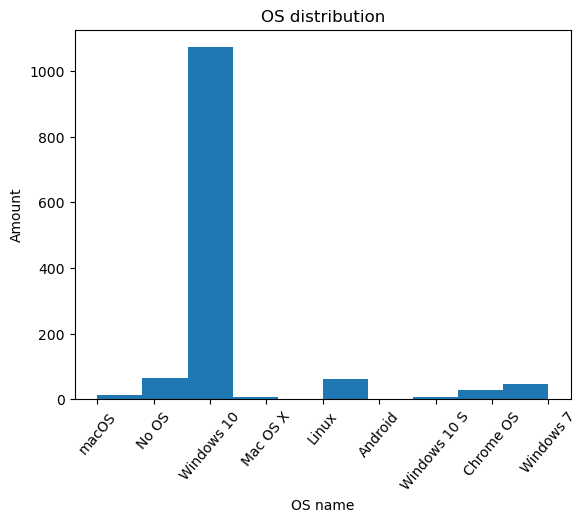

In [15]:
plt.hist(df['OpSys'])
plt.title('OS distribution')
plt.xlabel('OS name')
plt.ylabel('Amount')
plt.xticks(rotation=50);

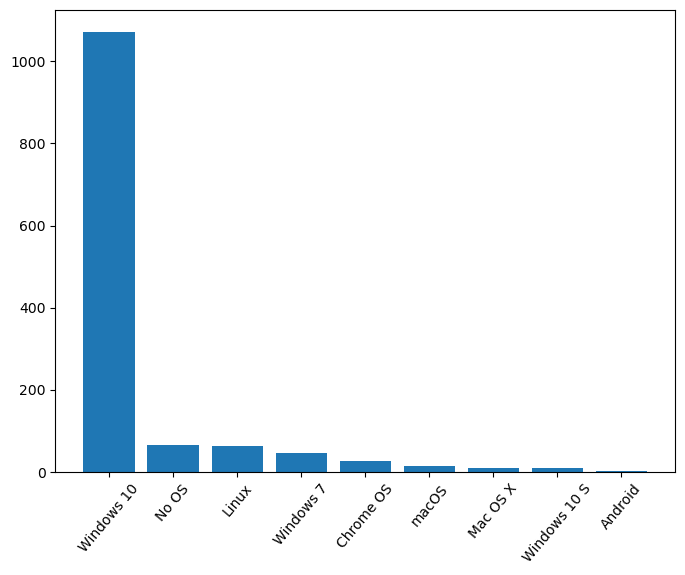

In [28]:
data = df['OpSys'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(data.index, data.values)
plt.xticks(rotation=50);

2.4 Изучите распределение компаний производителей CPUПостройте графикСделайте выводы

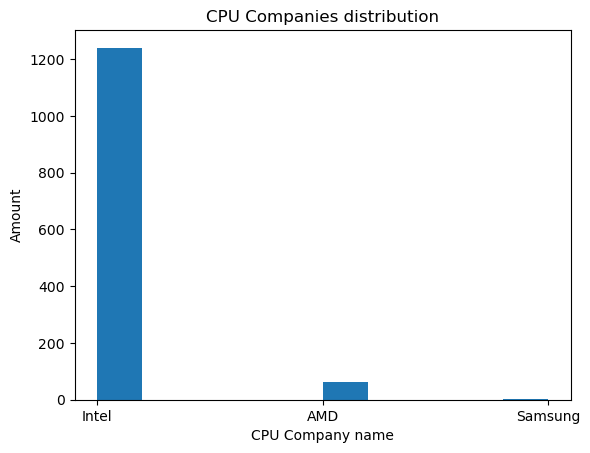

In [17]:
plt.hist(df['Cpu_Company'])
plt.title('CPU Companies distribution')
plt.xlabel('CPU Company name')
plt.ylabel('Amount');

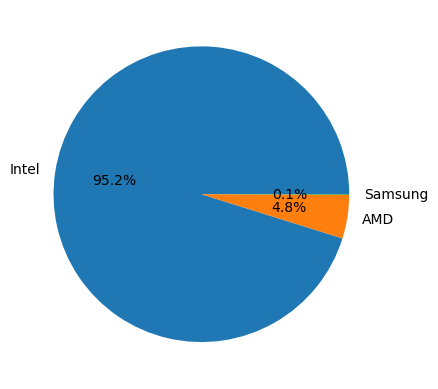

In [29]:
data = df['Cpu_Company'].value_counts()
plt.pie(data.values, autopct='%.1f%%', labels=data.index);

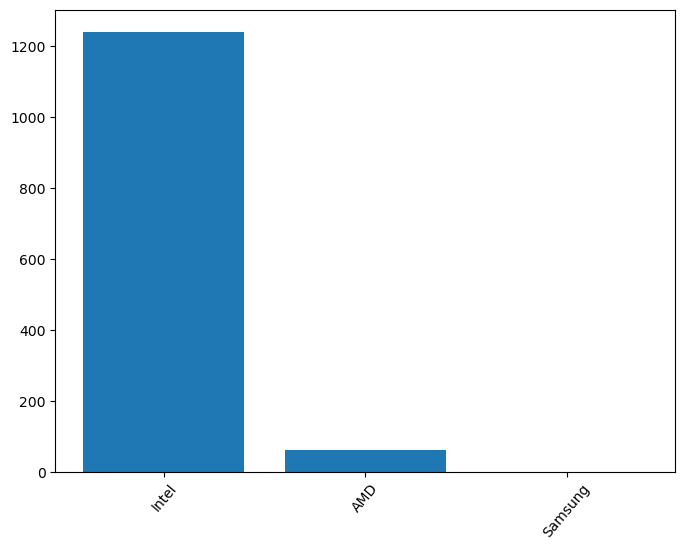

In [30]:
plt.figure(figsize=(8, 6))
plt.bar(data.index, data.values)
plt.xticks(rotation=50);

## Task 3
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграммуПроцессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах

In [31]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
data = data.drop(columns=['Samsung']).reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


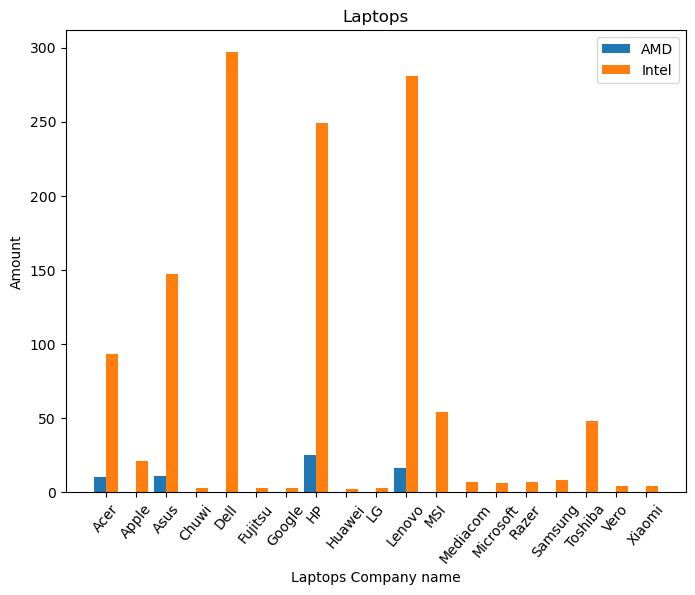

In [38]:
plt.figure(figsize=(8, 6))
n_ticks = np.arange(len(data['AMD']))

offset = 0.2
plt.bar(n_ticks - offset, data['AMD'], width=0.4)
plt.bar(n_ticks + offset, data['Intel'], width=0.4)

plt.title('Laptops')
plt.xlabel('Laptops Company name')
plt.ylabel('Amount')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data['Company'], rotation=50);

3.2 Постройте график в относительных величинах

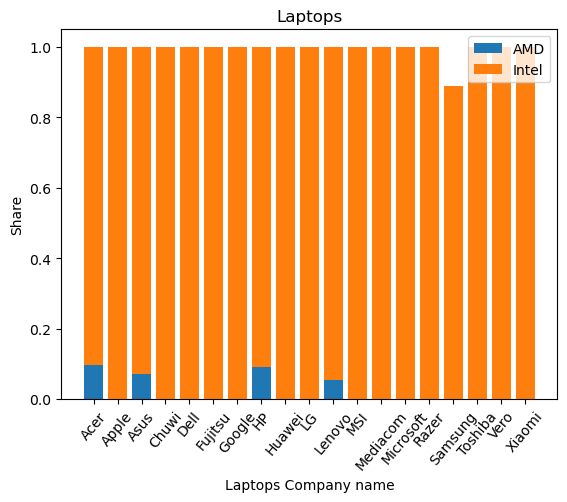

In [41]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize='index')
data = data.drop(columns=['Samsung']).reset_index()
# n_ticks = np.arange(len(data['AMD']))

# offset = 0.2
plt.bar(data['Company'], data['AMD'])
plt.bar(data['Company'], data['Intel'], bottom=data['AMD'])

plt.title('Laptops')
plt.xlabel('Laptops Company name')
plt.ylabel('Share')
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation=50);

## Task 4
4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

Text(0, 0.5, 'CPU Company')

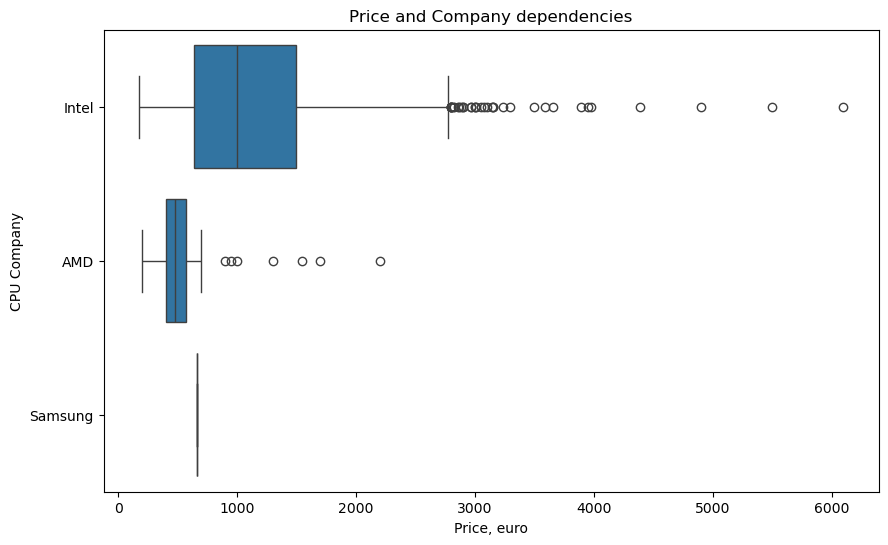

In [44]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], whis=1.5)

plt.title('Price and Company dependencies')
plt.xlabel('Price, euro')
plt.ylabel('CPU Company')

4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

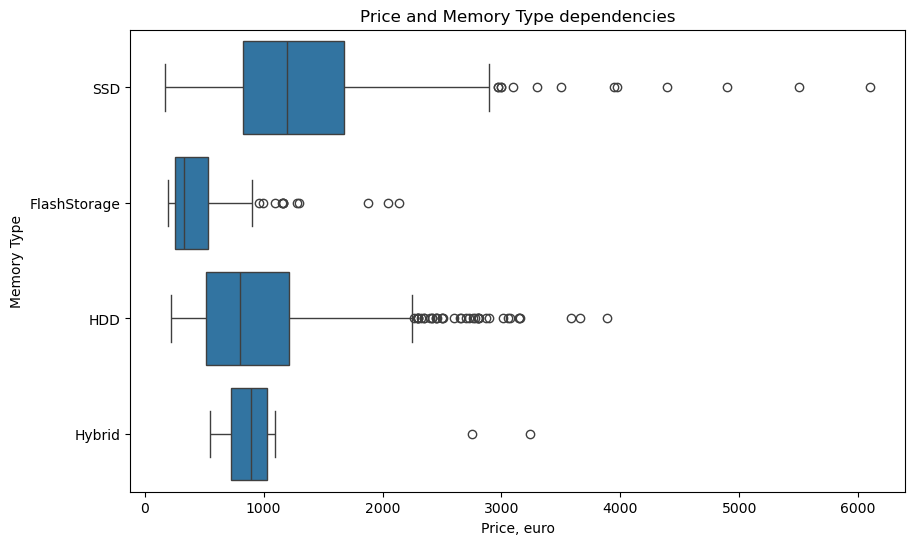

In [45]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], whis=1.5)

plt.title('Price and Memory Type dependencies')
plt.xlabel('Price, euro')
plt.ylabel('Memory Type');

4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

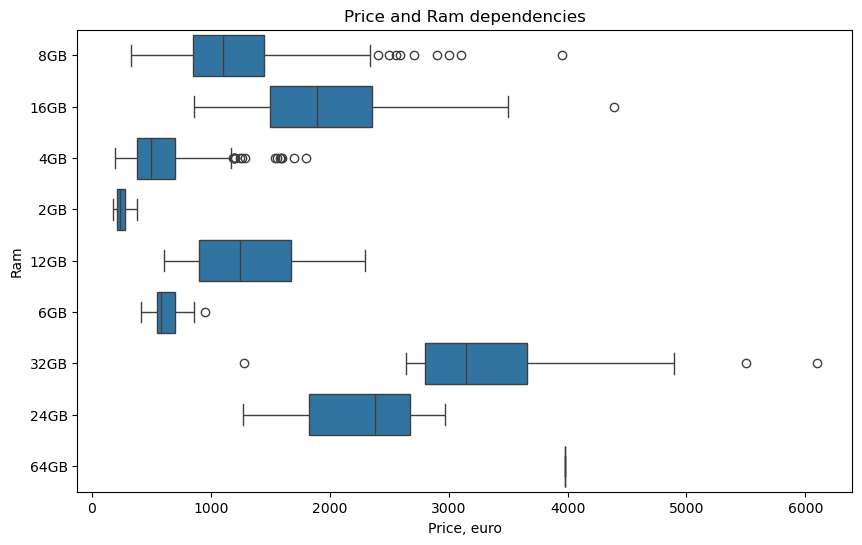

In [46]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['Price_euros'], y=df['Ram'], whis=1.5)

plt.title('Price and Ram dependencies')
plt.xlabel('Price, euro')
plt.ylabel('Ram');

4.4 Изучите взаимосвязь стоимости ноутбука и компании производителяПостройте графикНазовите графикСделайте именование оси x и оси yСделайте выводы

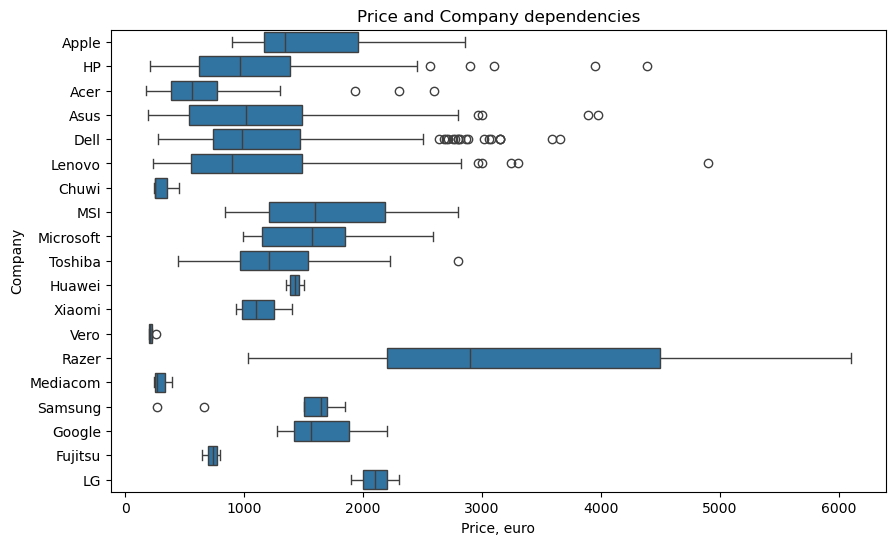

In [47]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['Price_euros'], y=df['Company'], whis=1.5)

plt.title('Price and Company dependencies')
plt.xlabel('Price, euro')
plt.ylabel('Company');

## Task 5
Постройте матрицу корреляций для таблицы

In [67]:
df1 = pd.read_csv('laptops_10.csv', encoding='latin-1')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   Product        1303 non-null   object 
 2   TypeName       1303 non-null   object 
 3   Inches         1303 non-null   float64
 4   Cpu            1303 non-null   object 
 5   Ram            1303 non-null   object 
 6   Gpu            1303 non-null   object 
 7   OpSys          1303 non-null   object 
 8   Weight         1303 non-null   float64
 9   Price_euros    1303 non-null   float64
 10  Cpu_Company    1303 non-null   object 
 11  Memory_Amount  1303 non-null   int64  
 12  Memory_Type    1303 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


In [68]:
numeric_columns = df1.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df1[numeric_columns].corr()
corr_matrix

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.000000,0.827631,0.068197,0.269718
Weight,0.827631,1.000000,0.210370,0.180557
Price_euros,0.068197,0.210370,1.000000,-0.125363
Memory_Amount,0.269718,0.180557,-0.125363,1.000000


In [69]:
corr_matrix = np.round(corr_matrix, 1)
corr_matrix

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.1,0.3
Weight,0.8,1.0,0.2,0.2
Price_euros,0.1,0.2,1.0,-0.1
Memory_Amount,0.3,0.2,-0.1,1.0


In [70]:
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.0,0.3
Weight,0.8,1.0,0.0,0.0
Price_euros,0.0,0.0,1.0,0.0
Memory_Amount,0.3,0.0,0.0,1.0


<Axes: >

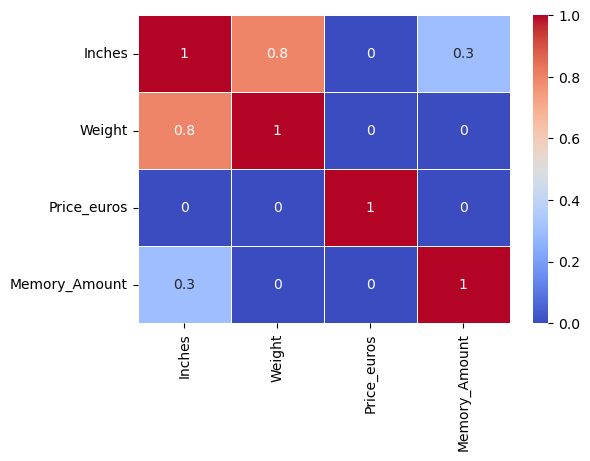

In [74]:
plt.figure(figsize=(6, 4))

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')